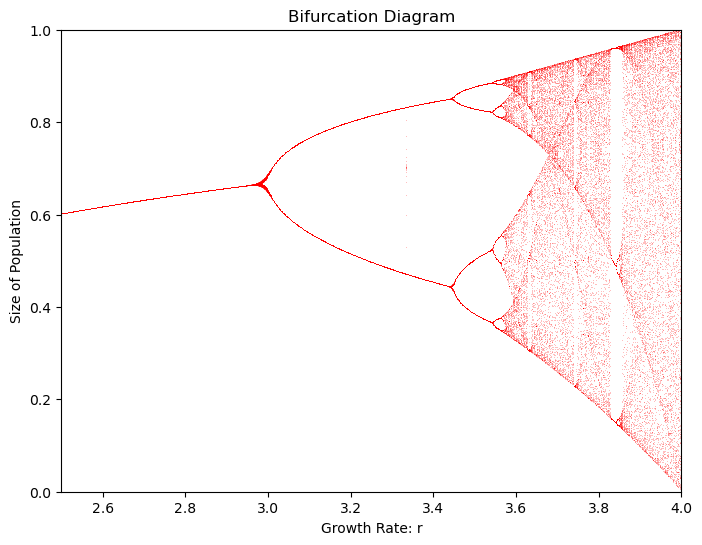

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of iterations and the range of the growth rate 'r'
iterations = 100
last = 100
r_values = np.linspace(2.5, 4.0, 1000)

# Setup the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_xlim(2.5, 4.0)
ax.set_ylim(0, 1)
ax.set_xlabel('Growth Rate: r')
ax.set_ylabel('Size of Population')
ax.set_title('Bifurcation Diagram')

# Iterate over the range of r values
for r in r_values:
    x = 0.1
    for i in range(iterations + last):
        x = r * x * (1 - x)
        # Only plot the iterations after the transient behaviors have settled
        if i >= iterations:
            ax.plot(r, x, ',r', alpha=.25)

plt.show()

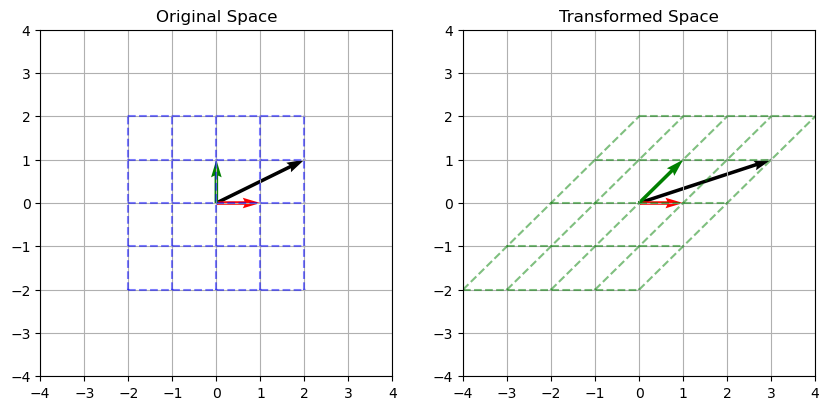

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the linear transformation matrix
A = np.array([[1, 1], 
              [0, 1]])

# Generate grid lines in the original space
x = np.linspace(-2, 2, 5)
y = np.linspace(-2, 2, 5)
X, Y = np.meshgrid(x, y)
U, V = np.zeros(X.shape), np.zeros(Y.shape)

# Define the base vectors i = [1, 0] and j= [0, 1] 
vi = np.array([1, 0])
vj = np.array([0, 1])

# Define a vector:
v = np.array([2, 1])

# Transform the vector using the matrix A
vi_transformed = A.dot(vi)
vj_transformed = A.dot(vj)

v_transformed = A.dot(v)

# Plot the original grid lines and the vector
fig, ax = plt.subplots(1, 2, figsize=(10, 4.5))

ax[0].quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.5)

for i in range(len(x)):
    ax[0].plot(X[i,:], Y[i,:], 'b--', alpha=0.5)
    ax[0].plot(X[:,i], Y[:,i], 'b--', alpha=0.5)

# Draw the original vector in the original space
ax[0].quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='black', width=0.01)
ax[0].quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='red', width=0.01)
ax[0].quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1, color='green', width=0.01)

ax[0].set_title('Original Space')
ax[0].set_xlim([-4, 4])
ax[0].set_ylim([-4, 4])
ax[0].grid(True)

# Apply the linear transformation to the grid lines
X_transformed, Y_transformed = A.dot(np.vstack([X.flatten(), Y.flatten()]))

# Reshape for plotting
X_transformed = X_transformed.reshape(X.shape)
Y_transformed = Y_transformed.reshape(Y.shape)

# Plot the transformed grid lines and the transformed vector
ax[1].quiver(X_transformed, Y_transformed, U, V, angles='xy', scale_units='xy', scale=1, color='green', alpha=0.5)
for i in range(len(x)):
    ax[1].plot(X_transformed[i,:], Y_transformed[i,:], 'g--', alpha=0.5)
    ax[1].plot(X_transformed[:,i], Y_transformed[:,i], 'g--', alpha=0.5)

# Draw the transformed vector in the new space
ax[1].quiver(0, 0, v_transformed[0], v_transformed[1], angles='xy', scale_units='xy', scale=1, color='black', width=0.01)

ax[1].quiver(0, 0, vi_transformed[0], vi_transformed[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)
ax[1].quiver(0, 0, vj_transformed[0], vj_transformed[1], angles='xy', scale_units='xy', scale=1, color='green', width=0.01)

ax[1].set_title('Transformed Space')
ax[1].set_xlim([-4, 4])
ax[1].set_ylim([-4, 4])
ax[1].grid(True)

plt.show()

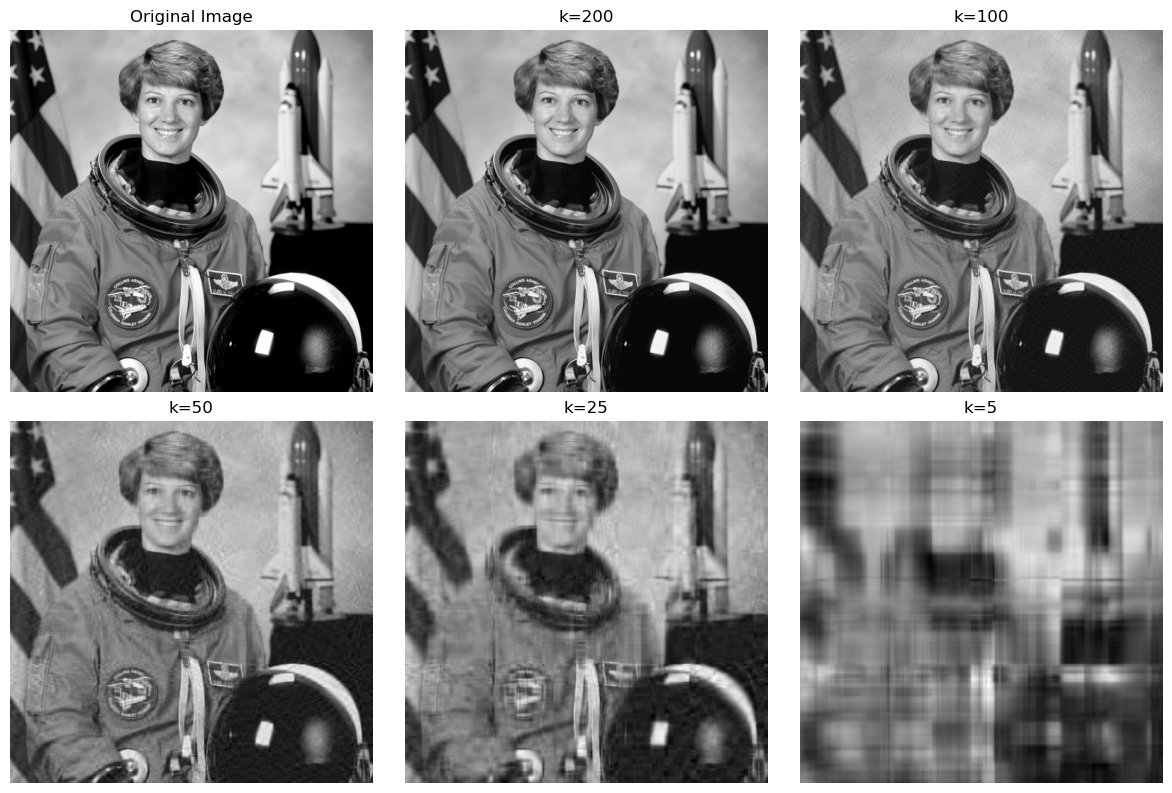

In [5]:
from skimage import data
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Load an example image and convert it to grayscale
image = rgb2gray(data.astronaut())
# Perform SVD
U, sigma, VT = svd(image)

# Function to reconstruct image from SVD components
def reconstruct_image(U, sigma, VT, k):
    # Reconstruct the image with the first k singular values/vectors
    sigma_reduced = np.zeros((U.shape[0], VT.shape[0]))
    sigma_reduced[:k, :k] = np.diag(sigma[:k])
    return U[:, :k] @ sigma_reduced[:k, :k] @ VT[:k, :]

# Define different levels of compression
k_values = [200, 100, 50, 25, 5]

# Initialize plot
plt.figure(figsize=(12, 8))

# Plot the original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot images with reduced dimensions
for i, k in enumerate(k_values, start=2):
    compressed_image = reconstruct_image(U, sigma, VT, k)
    plt.subplot(2, 3, i)
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f'k={k}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
import random

def simulate_monty_hall(num_simulations):
  """
  Simulates the Monty Hall Problem a given number of times and returns the win rates
  for both staying and switching strategies.

  Args:
    num_simulations: The number of times to simulate the problem.

  Returns:
    A tuple containing the win rates for staying and switching strategies.
  """
  
  wins_staying = 0
  wins_switching = 0

  for _ in range(num_simulations):
    # Choose a random door to hide the prize
    prize_door = random.randint(1, 3)

    # Player chooses a random door
    chosen_door = random.randint(1, 3)

    # Monty reveals a goat behind one of the unchosen doors
    revealed_door = chosen_door
    while revealed_door == chosen_door or revealed_door == prize_door:
      revealed_door = random.randint(1, 3)

    # Track wins for both strategies
    if chosen_door == prize_door:
      wins_staying += 1
    else:
      wins_switching += 1

  # Calculate and return win rates
  staying_win_rate = wins_staying / num_simulations
  switching_win_rate = wins_switching / num_simulations

  return staying_win_rate, switching_win_rate

# Run simulations and print win rates
num_simulations = 10000
staying_win_rate, switching_win_rate = simulate_monty_hall(num_simulations)

print(f"Win rate for staying: {staying_win_rate:.4f}")
print(f"Win rate for switching: {switching_win_rate:.4f}")


Win rate for staying: 0.3380
Win rate for switching: 0.6620


In [2]:
def generate_pascals_triangle(n):
    triangle = []
    for row_number in range(n):
        row = [1] if row_number == 0 else [1] + [triangle[row_number - 1][i - 1] + triangle[row_number - 1][i] for i in range(1, row_number)] + [1]
        triangle.append(row)
    return triangle

def print_pascals_triangle(triangle):
    # Find the width of the bottom row, and make it looks triangle-like
    last_row_str = ' '.join(map(str, triangle[-1]))
    max_width = len(last_row_str)

    for row in triangle:
        # Convert the current row to a string
        row_str = ' '.join(map(str, row))
        # Center the current row string based on the length of the last row
        print(row_str.center(max_width))

# Generate the triangle given n, the number of rows 
n = 10  # Number of rows
pascals_triangle = generate_pascals_triangle(n)

# Print Pascal's Triangle as an isosceles triangle
print_pascals_triangle(pascals_triangle)

             1             
            1 1            
           1 2 1           
          1 3 3 1          
         1 4 6 4 1         
       1 5 10 10 5 1       
      1 6 15 20 15 6 1     
    1 7 21 35 35 21 7 1    
   1 8 28 56 70 56 28 8 1  
1 9 36 84 126 126 84 36 9 1


In [5]:
def generate_pascals_triangle(n):
    triangle = []
    for row_number in range(n):
        row = [1] if row_number == 0 else [1] + [triangle[row_number - 1][i - 1] + triangle[row_number - 1][i] for i in range(1, row_number)] + [1]
        triangle.append(row)
    return triangle

def print_pascals_triangle(triangle):
    # Find the width of the bottom row
    # Convert the last row to a string and calculate its length
    last_row_str = ' '.join(map(str, triangle[-1]))
    max_width = len(last_row_str)
    
    for row in triangle:
        # Convert the current row to a string
        row_str = ' '.join(map(str, row))
        # Center the current row string based on the length of the last row
        print(row_str.center(max_width))

# Example usage
n = 5  # Number of rows
pascals_triangle = generate_pascals_triangle(n)

# Print Pascal's Triangle as an isosceles triangle
print_pascals_triangle(pascals_triangle)

    1    
   1 1   
  1 2 1  
 1 3 3 1 
1 4 6 4 1


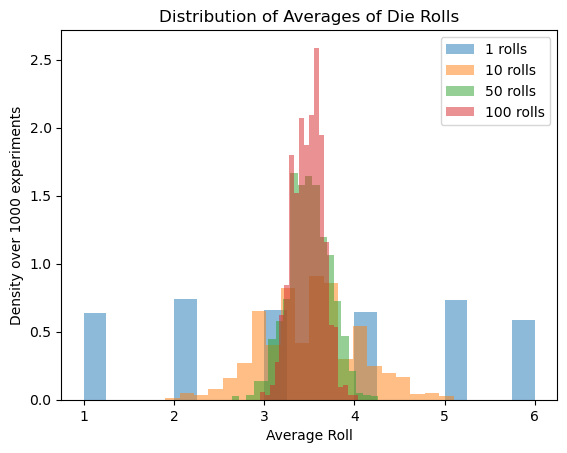

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def roll_dice_and_average(num_rolls, num_experiments):

    """
    Simulate rolling a die 'num_rolls' times and return the averaging result. 
    Repeat this process 'num_experiments' times to form a distribution of the averaged results. 
    """
  
    averages = []
    for _ in range(num_experiments):
        rolls = np.random.randint(1, 7, num_rolls)  # Roll the die 'num_rolls' times
        average = np.mean(rolls)  # Calculate the average of the rolls
        averages.append(average)   
    return averages # the returned averages are with the size of num_experiments

# Simulate rolling a die with different numbers of rolls
num_experiments = 1000  # Number of experiments

for num_rolls in [1, 10, 50, 100]:
    averages = roll_dice_and_average(num_rolls, num_experiments)
    plt.hist(averages, bins=20, density=True, alpha=0.5, label=f'{num_rolls} rolls')

plt.title('Distribution of Averages of Die Rolls')
plt.xlabel('Average Roll')
plt.ylabel(f'Density over {num_experiments} experiments')
plt.legend()
plt.show()

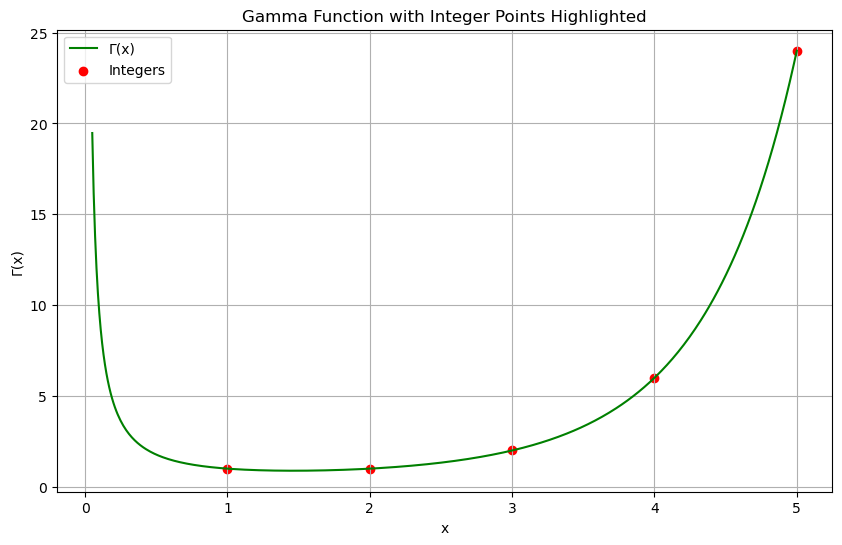

: 

In [ ]:
import scipy.special as sps
import matplotlib.pyplot as plt
import numpy as np

# Define the gamma function for real numbers from scipy
gamma_function = np.vectorize(sps.gamma)

# Define a range of x values from 0 (silightly larger, i.e. 0.05)
# to 5 with a small step to plot the gamma function
x_values = np.linspace(0.05, 5, 500)
y_values = gamma_function(x_values)

# Define x and y values for integer points
int_x_values = np.arange(1, 6)
int_y_values = gamma_function(int_x_values)

# Plot the gamma function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Γ(x)', color ='green')

# Plot red dots at integer values
plt.scatter(int_x_values, int_y_values, color='red', label='Integers')

# Add labels, title, legend, and grid
plt.xlabel('x')
plt.ylabel('Γ(x)')
plt.title('Gamma Function with Integer Points Highlighted')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()